In [510]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [511]:
train = pd.read_csv('./train.csv',index_col=False)
test = pd.read_csv('./test.csv')
print('train.shape: ',train.shape)
print('test.shape: ',test.shape)
print(train.columns)

train.shape:  (108800, 11)
test.shape:  (27200, 10)
Index(['user_id', 'device_id', 'age', 'sex', 'browser', 'source', 'country',
       'purchase_value', 'signup_time', 'purchase_time', 'class'],
      dtype='object')


In [512]:
alldata = pd.concat((train.loc[:,'age':'purchase_time'],
                     test.loc[:,'age':'purchase_time']))
alldata.shape

(136000, 8)

In [513]:
alldata = alldata.reset_index(drop=True)

In [514]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136000 entries, 0 to 135999
Data columns (total 8 columns):
age               136000 non-null int64
sex               136000 non-null int64
browser           136000 non-null object
source            136000 non-null object
country           116234 non-null object
purchase_value    136000 non-null int64
signup_time       136000 non-null object
purchase_time     136000 non-null object
dtypes: int64(3), object(5)
memory usage: 8.3+ MB


In [515]:
alldata

,age,sex,browser,source,country,purchase_value,signup_time,purchase_time
0,33,0,Safari,Ads,United States,48,2018-05-27 12:02:29,2018-08-19 14:09:55
1,26,1,Chrome,Direct,European Union,50,2018-06-06 08:09:12,2018-09-09 01:26:43
2,28,0,Chrome,Direct,United States,31,2018-03-29 18:24:17,2018-06-13 04:56:21
3,50,0,FireFox,Ads,United States,31,2018-06-18 02:49:33,2018-06-29 23:31:45
4,27,1,IE,SEO,United States,16,2018-01-31 18:26:38,2018-02-13 16:36:51
...,...,...,...,...,...,...,...,...
135995,29,1,IE,SEO,United States,48,2018-03-08 05:02:33,2018-05-05 23:04:43
135996,42,0,Safari,Ads,France,12,2018-05-15 23:23:29,2018-05-19 06:35:14
135997,41,1,Chrome,Ads,NaN,26,2018-06-08 15:39:11,2018-06-13 17:24:44
135998,36,1,IE,Ads,Romania,17,2018-06-25 12:47:27,2018-08-27 19:17:54


In [516]:
alldata['browser'].value_counts(dropna=False)

Chrome     55204
IE         33091
Safari     22240
FireFox    22160
Opera       3305
Name: browser, dtype: int64

In [517]:
alldata['source'].value_counts(dropna=False)

SEO       54483
Ads       53908
Direct    27609
Name: source, dtype: int64

In [518]:
alldata['country'].value_counts(dropna=False)

United States                    52206
NaN                              19766
China                            10857
Japan                             6577
United Kingdom                    4028
                                 ...  
Yemen                                1
Dominica                             1
Antigua and Barbuda                  1
Bonaire; Sint Eustatius; Saba        1
Niger                                1
Name: country, Length: 181, dtype: int64

In [519]:
alldata['country'].unique() #unique 函數去除其中重複的元素，並按元素由大到小返回一個新的無元素重複的元組或者列表

array(['United States', 'European Union', nan, 'Germany', 'Japan',
       'Hong Kong', 'Netherlands', 'France', 'Norway', 'China', 'Poland',
       'Spain', 'Italy', 'United Kingdom', 'Korea Republic of', 'Brazil',
       'Russian Federation', 'Pakistan', 'Kenya', 'Denmark', 'Peru',
       'Australia', 'Switzerland', 'Belgium', 'Bulgaria', 'Viet Nam',
       'Singapore', 'Czech Republic', 'Finland', 'India', 'Sweden',
       'Antigua and Barbuda', 'Turkey', 'Mexico', 'Latvia', 'Colombia',
       'Canada', 'Argentina', 'South Africa', 'Lebanon',
       'Moldova Republic of', 'Israel', 'Iran (ISLAMIC Republic Of)',
       'Taiwan; Republic of China (ROC)', 'Hungary',
       'Syrian Arab Republic', 'Costa Rica', 'Greece', 'Iraq', 'Ecuador',
       'Croatia (LOCAL Name: Hrvatska)', 'Georgia', 'Thailand', 'Ukraine',
       'Austria', 'New Zealand', 'Chile', 'Libyan Arab Jamahiriya',
       'Ireland', 'Indonesia', 'Tunisia', 'Saudi Arabia', 'Portugal',
       'Romania', 'El Salvador', 'Phili

In [520]:
alldata[col_list].iloc[[i for i in range(1,1500,200)]] #取出[1,201,401,601,801,1001,1201,1401]筆資料 - 介於1~1500，間隔200

,browser,source,country
1,Chrome,Direct,European Union
201,Chrome,SEO,United States
401,FireFox,Ads,NaN
601,FireFox,SEO,China
801,Chrome,Direct,United States
1001,IE,SEO,United Kingdom
1201,Safari,Ads,United States
1401,IE,SEO,United States


In [521]:
col_list = ['browser','source', 'country']
alldata[col_list].iloc[[i for i in range(1,1500,200)]] #取出[1,201,401,601,801,1001,1201,1401]筆資料 - 介於1~1500，間隔200

,browser,source,country
1,Chrome,Direct,European Union
201,Chrome,SEO,United States
401,FireFox,Ads,NaN
601,FireFox,SEO,China
801,Chrome,Direct,United States
1001,IE,SEO,United Kingdom
1201,Safari,Ads,United States
1401,IE,SEO,United States


In [522]:
#利用scikitlearn的preprocessing做LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#擬合數據後，再將Encoder好的數據轉換上去
le.fit(alldata['browser'].unique())
alldata['browser'] = le.transform(alldata['browser'].values)
le.fit(alldata['source'].unique())
alldata['source'] = le.transform(alldata['source'].values)


In [523]:
alldata[col_list].iloc[[i for i in range(1,1500,200)]] #取出[1,201,401,601,801,1001,1201,1401]筆資料 - 介於1~1500，間隔200

,browser,source,country
1,0,1,European Union
201,0,2,United States
401,1,0,NaN
601,1,2,China
801,0,1,United States
1001,2,2,United Kingdom
1201,4,0,United States
1401,2,2,United States


In [524]:
alldata = pd.get_dummies(alldata, columns = ['browser','source'])

In [525]:
alldata.head()

,age,sex,country,purchase_value,signup_time,purchase_time,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,source_1,source_2
0,33,0,United States,48,2018-05-27 12:02:29,2018-08-19 14:09:55,0,0,0,0,1,1,0,0
1,26,1,European Union,50,2018-06-06 08:09:12,2018-09-09 01:26:43,1,0,0,0,0,0,1,0
2,28,0,United States,31,2018-03-29 18:24:17,2018-06-13 04:56:21,1,0,0,0,0,0,1,0
3,50,0,United States,31,2018-06-18 02:49:33,2018-06-29 23:31:45,0,1,0,0,0,1,0,0
4,27,1,United States,16,2018-01-31 18:26:38,2018-02-13 16:36:51,0,0,1,0,0,0,0,1


In [526]:
# alldata['signup_date'] = [d.date() for d in alldata['signup_time']]
# alldata['signup_hms'] = [d.time() for d in alldata['signup_time']]
from datetime import datetime
date_sign = alldata['signup_time'].values.tolist()


sign_year=[]
sign_month=[]
sign_day=[]
sign_hr=[]
sign_min=[]
sign_sec=[]
for i in date_sign:
    sign = datetime.strptime(i, "%Y-%m-%d  %H:%M:%S")
    sign_year.append(sign.year)
    sign_month.append(sign.month)
    sign_day.append(sign.day)
    sign_hr.append(sign.hour)
    sign_min.append(sign.minute)
    sign_sec.append(sign.second)
    

In [527]:
# date_sign2=[sign_year,sign_month,sign_day,sign_hr,sign_min, sign_sec]
# date_sign_label = ['sign_y','sign_mon','sign_d','sign_h','sign_m', 'sign_s']

alldata['sign_y']= sign_year
alldata['sign_mon']= sign_month
alldata['sign_d']= sign_day
alldata['sign_h']= sign_hr
alldata['sign_m']= sign_min
alldata['sign_s']= sign_sec

In [528]:
time_buy = alldata['purchase_time'].values.tolist()

purchase_year=[]
purchase_month=[]
purchase_day=[]
purchase_hr=[]
purchase_min=[]
purchase_sec=[]
for i in time_buy:
    purchase = datetime.strptime(i, "%Y-%m-%d  %H:%M:%S")
    purchase_year.append(purchase.year)
    purchase_month.append(purchase.month)
    purchase_day.append(purchase.day)
    purchase_hr.append(purchase.hour)
    purchase_min.append(purchase.minute)
    purchase_sec.append(purchase.second)


In [529]:
alldata['purchase_y']= purchase_year
alldata['purchase_mon']= purchase_month
alldata['purchase_d']= purchase_day
alldata['purchase_h']= purchase_hr
alldata['purchase_m']= purchase_min
alldata['purchase_s']= purchase_sec


In [530]:
alldata = alldata.drop(columns = ['signup_time','purchase_time'])

In [531]:
alldata

,age,sex,country,purchase_value,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,...,sign_d,sign_h,sign_m,sign_s,purchase_y,purchase_mon,purchase_d,purchase_h,purchase_m,purchase_s
0,33,0,United States,48,0,0,0,0,1,1,...,27,12,2,29,2018,8,19,14,9,55
1,26,1,European Union,50,1,0,0,0,0,0,...,6,8,9,12,2018,9,9,1,26,43
2,28,0,United States,31,1,0,0,0,0,0,...,29,18,24,17,2018,6,13,4,56,21
3,50,0,United States,31,0,1,0,0,0,1,...,18,2,49,33,2018,6,29,23,31,45
4,27,1,United States,16,0,0,1,0,0,0,...,31,18,26,38,2018,2,13,16,36,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135995,29,1,United States,48,0,0,1,0,0,0,...,8,5,2,33,2018,5,5,23,4,43
135996,42,0,France,12,0,0,0,0,1,1,...,15,23,23,29,2018,5,19,6,35,14
135997,41,1,NaN,26,1,0,0,0,0,1,...,8,15,39,11,2018,6,13,17,24,44
135998,36,1,Romania,17,0,0,1,0,0,1,...,25,12,47,27,2018,8,27,19,17,54


In [532]:
missing_df =alldata[ alldata.isna().any(axis=1)]

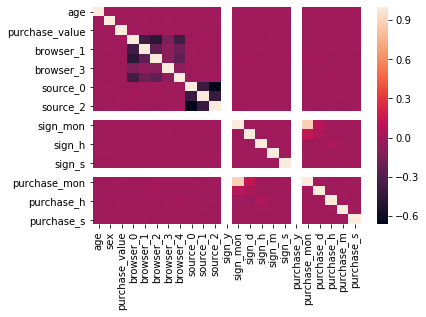

In [533]:
# df = pd.DataFrame(data,columns=['A','B','C'])
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = alldata.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

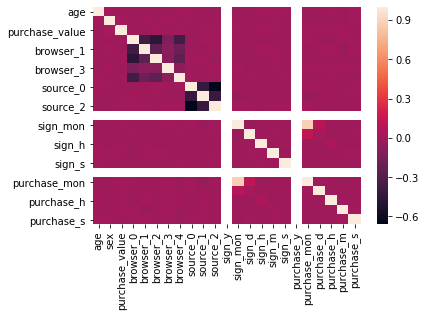

In [534]:

corrMatrix = missing_df.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()


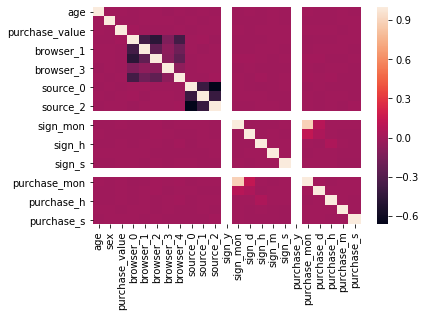

In [535]:
comp_df = alldata.dropna()
corrMatrix = comp_df.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [536]:
def pairs(df):
    r = ~alldata.isnull()
    m = alldata.isnull()
    rr = dict()
    rm = dict()
    mr = dict()
    mm = dict()
    for i in df.columns:
        real = r.groupby(by=i)[r.columns].sum()
        miss = m.groupby(by=i)[m.columns].sum()
        if real.shape[0] < 2:
            tempR = real.T
            tempM = miss.T
            tempR[not(real.index.values)] = 0
            tempM[not(miss.index.values)] = 0
            real = tempR.T
            miss = tempM.T
        rr[i] = real.loc[True].values
        rm[i] = miss.loc[False].values
        mr[i] = real.loc[False].values
        mm[i] = miss.loc[True].values
    print('rr'), display(pd.DataFrame(rr))
    print('rm'), display(pd.DataFrame(rm))
    print('mr'), display(pd.DataFrame(mr))
    print('mm'), display(pd.DataFrame(mm))

In [537]:
pairs(alldata)

rr


,age,sex,country,purchase_value,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,...,sign_d,sign_h,sign_m,sign_s,purchase_y,purchase_mon,purchase_d,purchase_h,purchase_m,purchase_s
0,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0
1,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0
2,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,...,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0,116234.0
3,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0
4,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0
5,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0
6,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0
7,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0
8,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0
9,136000.0,136000.0,116234.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,...,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0,136000.0


rm


,age,sex,country,purchase_value,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,...,sign_d,sign_h,sign_m,sign_s,purchase_y,purchase_mon,purchase_d,purchase_h,purchase_m,purchase_s
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19766.0,19766.0,0.0,19766.0,19766.0,19766.0,19766.0,19766.0,19766.0,19766.0,...,19766.0,19766.0,19766.0,19766.0,19766.0,19766.0,19766.0,19766.0,19766.0,19766.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


mr


,age,sex,country,purchase_value,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,...,sign_d,sign_h,sign_m,sign_s,purchase_y,purchase_mon,purchase_d,purchase_h,purchase_m,purchase_s
0,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


mm


,age,sex,country,purchase_value,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,...,sign_d,sign_h,sign_m,sign_s,purchase_y,purchase_mon,purchase_d,purchase_h,purchase_m,purchase_s
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [538]:
alldata = alldata.fillna(method='backfill')

In [539]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136000 entries, 0 to 135999
Data columns (total 24 columns):
age               136000 non-null int64
sex               136000 non-null int64
country           136000 non-null object
purchase_value    136000 non-null int64
browser_0         136000 non-null uint8
browser_1         136000 non-null uint8
browser_2         136000 non-null uint8
browser_3         136000 non-null uint8
browser_4         136000 non-null uint8
source_0          136000 non-null uint8
source_1          136000 non-null uint8
source_2          136000 non-null uint8
sign_y            136000 non-null int64
sign_mon          136000 non-null int64
sign_d            136000 non-null int64
sign_h            136000 non-null int64
sign_m            136000 non-null int64
sign_s            136000 non-null int64
purchase_y        136000 non-null int64
purchase_mon      136000 non-null int64
purchase_d        136000 non-null int64
purchase_h        136000 non-null int64
purchase

In [540]:
le.fit(alldata['country'].unique())
alldata['country'] = le.transform(alldata['country'].values)

In [541]:
alldata['country'].iloc[[i for i in range(1,1500,200)]] #取出[1,201,401,601,801,1001,1201,1401]筆資料 - 介於1~1500，間隔200

1        55
201     170
401     170
601      35
801     170
1001    169
1201    170
1401    170
Name: country, dtype: int64

In [542]:
alldata = pd.get_dummies(alldata, columns = ['country'])

In [543]:
alldata.head()

,age,sex,purchase_value,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,source_1,...,country_170,country_171,country_172,country_173,country_174,country_175,country_176,country_177,country_178,country_179
0,33,0,48,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,26,1,50,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28,0,31,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,50,0,31,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,27,1,16,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [544]:
train_trans=alldata[:108800]
test_trans =alldata[108800:]

In [545]:
train_trans.shape

(108800, 203)

In [546]:
test_trans.shape

(27200, 203)

In [547]:

bool_col = list(train.select_dtypes(['bool']).columns)

for c in bool_col:
    train[c] = train[c].astype(int)

In [548]:
temp_col = train['class']
temp_col

0         0
1         0
2         0
3         0
4         0
         ..
108795    0
108796    0
108797    0
108798    0
108799    0
Name: class, Length: 108800, dtype: int64

In [549]:
#train_trans['class'] = temp_col

In [436]:
fraud_df = train_trans.loc[train_trans['class']==1]
fraud_df.shape

(10132, 204)

In [437]:
true_df = train_trans.loc[train_trans['class']==0]
true_df = true_df.sample(n=10132)
true_df

,age,sex,purchase_value,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,source_1,...,country_171,country_172,country_173,country_174,country_175,country_176,country_177,country_178,country_179,class
25214,33,1,72,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
108158,47,1,41,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32508,36,1,55,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107553,27,0,38,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
42908,51,1,17,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,27,0,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23342,46,1,61,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56754,26,1,73,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
73417,26,0,29,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [438]:
train_df = pd.concat((fraud_df.loc[:,'age':'class'],
                     true_df.loc[:,'age':'class']))
train_df.shape

(20264, 204)

In [439]:

temp_col2 = train_df['class']
train_df = train_df.drop(columns=['class'])

In [440]:
train_df.head()

,age,sex,purchase_value,browser_0,browser_1,browser_2,browser_3,browser_4,source_0,source_1,...,country_170,country_171,country_172,country_173,country_174,country_175,country_176,country_177,country_178,country_179
28,26,0,13,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39,57,1,43,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,42,0,52,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
41,37,0,24,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
43,24,0,59,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [550]:
from sklearn.model_selection import train_test_split

In [551]:
X_train,X_test,Y_train,Y_test = train_test_split(train_trans,temp_col, test_size=0.3, random_state=86, shuffle=True)

In [552]:
# eval_metrics can selecy rmse, logloss, error,\
# auc, merror, mlogloss or custom define
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
eval_set = [(X_test, Y_test)]
model = XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=86,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model.fit(X_train,
          Y_train,
          early_stopping_rounds=10,
          eval_metric="auc",
          eval_set=eval_set,
          verbose=True)

[0]	validation_0-auc:0.767193
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.771872
[2]	validation_0-auc:0.772463
[3]	validation_0-auc:0.772022
[4]	validation_0-auc:0.768122
[5]	validation_0-auc:0.767238
[6]	validation_0-auc:0.765914
[7]	validation_0-auc:0.769389
[8]	validation_0-auc:0.768982
[9]	validation_0-auc:0.767154
[10]	validation_0-auc:0.764092
[11]	validation_0-auc:0.764808
[12]	validation_0-auc:0.767782
Stopping. Best iteration:
[2]	validation_0-auc:0.772463



XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=86,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [553]:
y_pred = model.predict_proba(X_test)
y_pred[:5]

array([[0.72819304, 0.27180693],
       [0.72819304, 0.27180693],
       [0.72819304, 0.27180693],
       [0.72819304, 0.27180693],
       [0.72819304, 0.27180693]], dtype=float32)

Accuracy: 95.52%


(array([30955.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1685.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

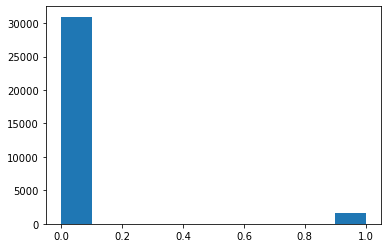

In [554]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plt.hist(y_pred)

In [555]:
id_col = test['user_id']
result = pd.DataFrame(columns=['user_id','class'])
result['class'] = model.predict(test_trans)
result.user_id = id_col

result

,user_id,class
0,8fdb79dfdab19,0
1,ae01bb5893cf5,0
2,563df4fb75a3d,0
3,b21070f161c56,0
4,ee9775da22b94,0
...,...,...
27195,cd16362b71572,0
27196,132fb9f609701,0
27197,4c6d7c325963f,0
27198,61daa6f70df29,0


In [556]:
result.to_csv('AT091086.csv',index=False)